<a href="https://colab.research.google.com/github/archi-c0der/Daily_Transaction-Data-analysis_project/blob/main/Daily_Transactions_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/content/Daily Household Transactions.csv'
df = pd.read_csv(file_path)


In [3]:
# Display the first few rows of the dataset
print("Initial Dataset Preview:")
print(df.head())

Initial Dataset Preview:
                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  


In [4]:
# Step 2: Data Cleaning
# Handle missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


In [6]:
# Fill missing values or drop rows with missing data
# Here we drop rows with missing values as an example
df_cleaned = df.dropna()
print("\nMissing values handled. New dataset shape:", df_cleaned.shape)


Missing values handled. New dataset shape: (1563, 8)


In [7]:
# Correct data types
# Converting 'Date' column to datetime
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

<ipython-input-7-955eb48625ea>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
<ipython-input-7-955eb48625ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


In [8]:
# Drop rows where 'Date' could not be converted
df_cleaned = df_cleaned.dropna(subset=['Date'])

# Convert 'Amount' column to numeric if necessary
if 'Amount' in df_cleaned.columns:
    df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')

# Drop rows where 'Amount' could not be converted
df_cleaned = df_cleaned.dropna(subset=['Amount'])

<ipython-input-8-061fa21714f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')


In [9]:
# Display data types to confirm changes
print("\nData types after correction:")
print(df_cleaned.dtypes)


Data types after correction:
Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object


In [10]:
# Remove duplicates
print("\nChecking for duplicates:")
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicates:
Number of duplicate rows: 0


In [11]:
df_cleaned = df_cleaned.drop_duplicates()

In [12]:
# Final shape after cleaning
print("\nFinal dataset shape after cleaning:", df_cleaned.shape)


Final dataset shape after cleaning: (932, 8)


In [13]:
# Step 3: Exploratory Data Analysis (EDA)

# Summary Statistics
print("\nSummary Statistics:")
print(df_cleaned.describe())


Summary Statistics:
                                Date        Amount
count                            932    932.000000
mean   2017-07-29 13:31:58.456008448    511.536642
min              2015-02-19 20:51:37      2.000000
25%    2017-03-15 03:48:10.750000128     30.000000
50%       2017-08-31 10:22:14.500000     64.000000
75%       2018-02-27 02:27:02.500000    215.000000
max              2018-09-20 12:04:08  50000.000000
std                              NaN   2832.495271


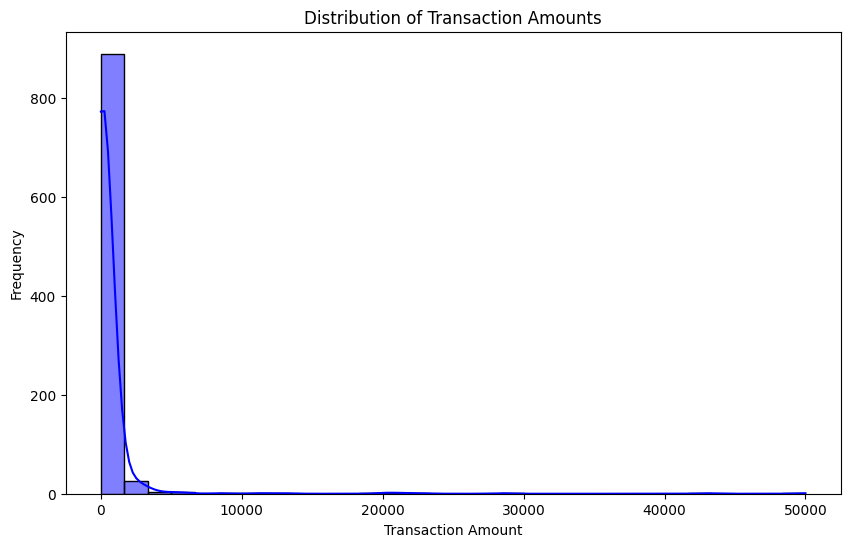

In [14]:
# Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-fe0d3917fcb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


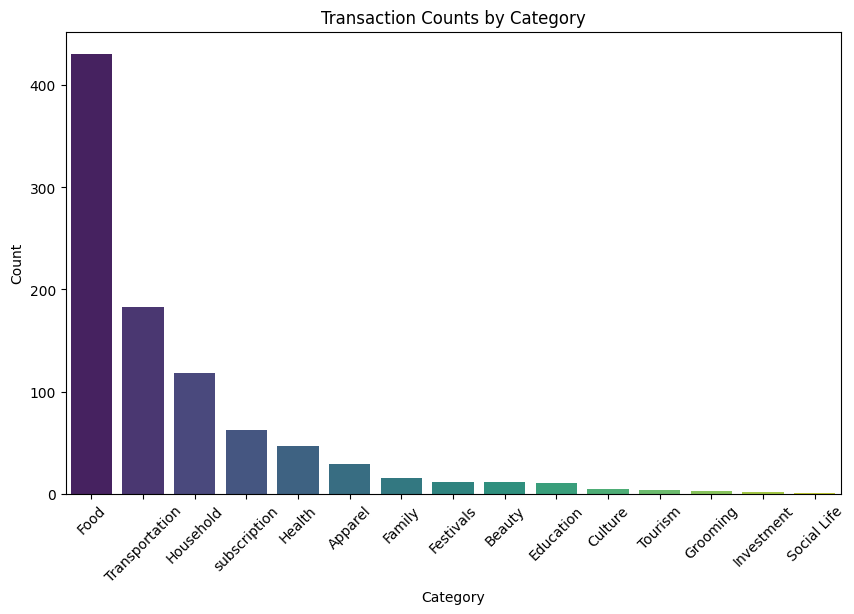

In [15]:
# Transaction Counts by Category
if 'Category' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    category_counts = df_cleaned['Category'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title('Transaction Counts by Category')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
# Transaction Counts by Type (Credit/Debit)
if 'Type' in df_cleaned.columns:
    plt.figure(figsize=(6, 6))
    type_counts = df_cleaned['Type'].value_counts()
    type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
    plt.title('Transaction Counts by Type')
    plt.ylabel('')  # Hide the y-label for a cleaner pie chart
    plt.show()

In [17]:
# Including this step for continuity; no duplicates should remain.
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of duplicates remaining after cleaning: {duplicates}")


Number of duplicates remaining after cleaning: 0


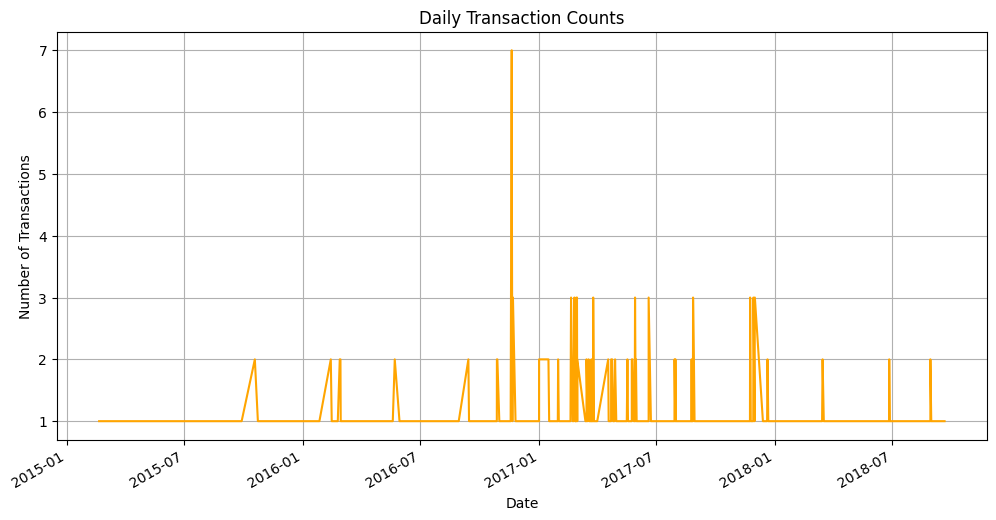

In [18]:
# Transaction counts over time (daily level)
if 'Date' in df_cleaned.columns:
    daily_counts = df_cleaned.groupby('Date').size()
    plt.figure(figsize=(12, 6))
    daily_counts.plot(color='orange')
    plt.title('Daily Transaction Counts')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.grid(True)
    plt.show()

In [19]:
# Step 4: Time Series Analysis

# Ensure the 'Date' column is in datetime format (handled in Step 2)
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

In [20]:
 #Extract year, month, and day for further analysis
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day'] = df_cleaned['Date'].dt.day



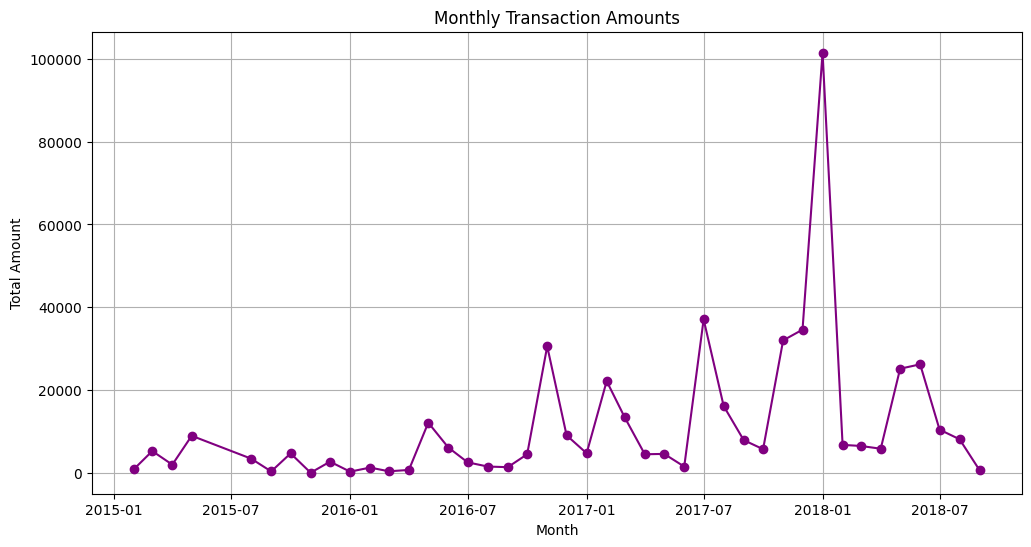

In [22]:
# Trend Analysis: Monthly Transaction Amounts
monthly_trends = df_cleaned.groupby(['Year', 'Month'])['Amount'].sum().reset_index()
monthly_trends['Year-Month'] = pd.to_datetime(monthly_trends[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 6))
plt.plot(monthly_trends['Year-Month'], monthly_trends['Amount'], marker='o', color='purple')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


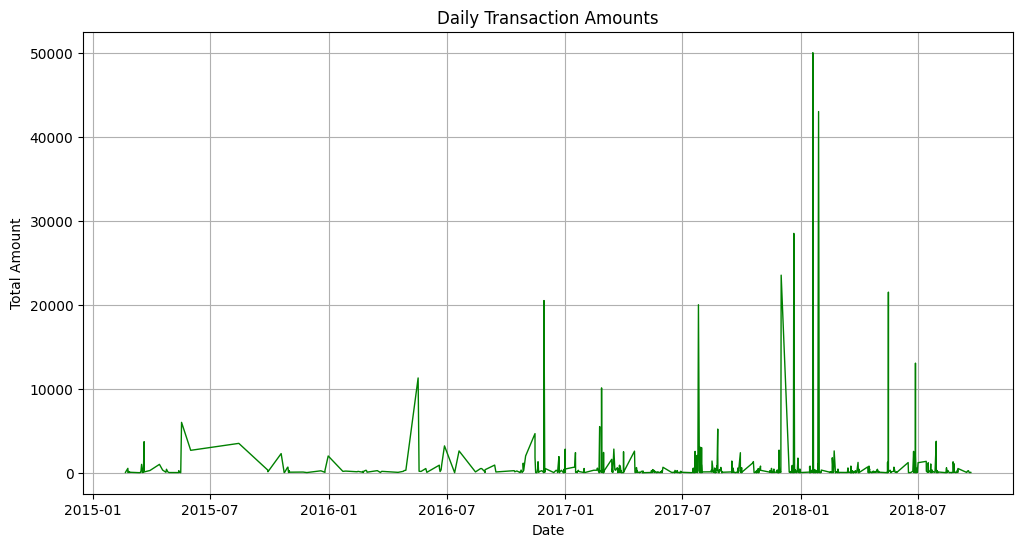

In [23]:
# Trend Analysis: Daily Transaction Amounts
daily_trends = df_cleaned.groupby('Date')['Amount'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_trends.index, daily_trends.values, color='green', linewidth=1)
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

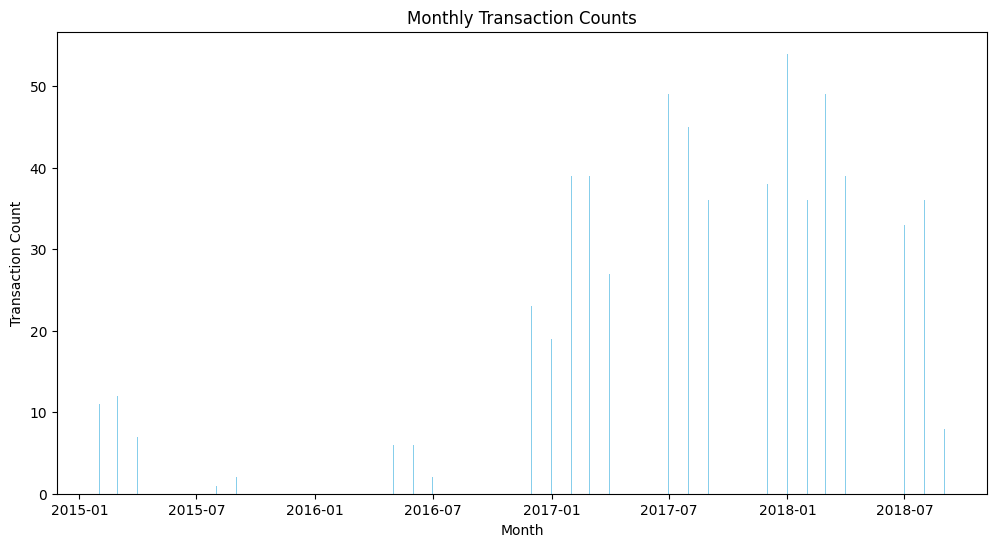

In [24]:
# Count of Transactions by Month
monthly_counts = df_cleaned.groupby(['Year', 'Month']).size().reset_index(name='Transaction Count')
monthly_counts['Year-Month'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(12, 6))
plt.bar(monthly_counts['Year-Month'], monthly_counts['Transaction Count'], color='skyblue')
plt.title('Monthly Transaction Counts')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()



In [25]:
# Identifying Peaks and Lows in Daily Trends
print("\nDaily Transaction Peaks:")
print(daily_trends.sort_values(ascending=False).head())

print("\nDaily Transaction Lows:")
print(daily_trends.sort_values(ascending=True).head())



Daily Transaction Peaks:
Date
2018-01-18 21:57:46    50000.0
2018-01-27 18:15:53    43000.0
2017-12-20 10:31:16    28495.0
2017-11-30 20:20:53    23522.0
2018-05-15 20:10:10    21500.0
Name: Amount, dtype: float64

Daily Transaction Lows:
Date
2017-11-27 13:38:55    5.0
2017-08-31 10:22:07    5.0
2017-08-26 22:17:11    5.0
2018-03-22 22:30:49    7.0
2017-10-23 21:28:37    9.0
Name: Amount, dtype: float64


In [27]:
# Step 5: Correlation Analysis

# Ensure 'Amount' is numeric and 'Category' is properly represented
if 'Amount' in df_cleaned.columns and 'Category' in df_cleaned.columns:
    # Create a pivot table for correlation analysis
    category_amount = df_cleaned.groupby('Category')['Amount'].sum().reset_index()



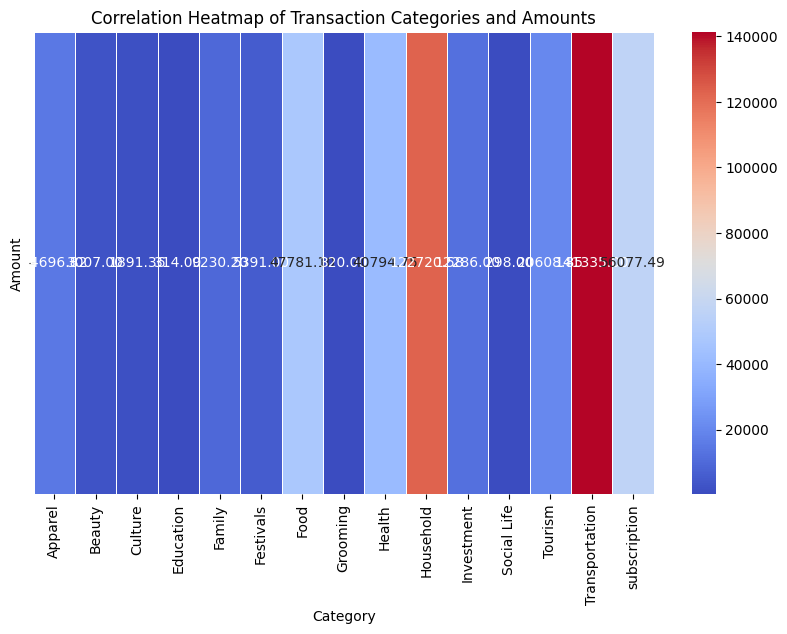

In [28]:
    # Visualize the correlation with a heatmap
    plt.figure(figsize=(10, 6))
    category_amount_pivot = pd.pivot_table(
        df_cleaned, values='Amount', index='Category', aggfunc='sum'
    )
    sns.heatmap(
        category_amount_pivot.T,
        annot=True,
        fmt=".2f",
        cmap='coolwarm',
        cbar=True,
        linewidths=0.5,
    )
    plt.title('Correlation Heatmap of Transaction Categories and Amounts')
    plt.show()



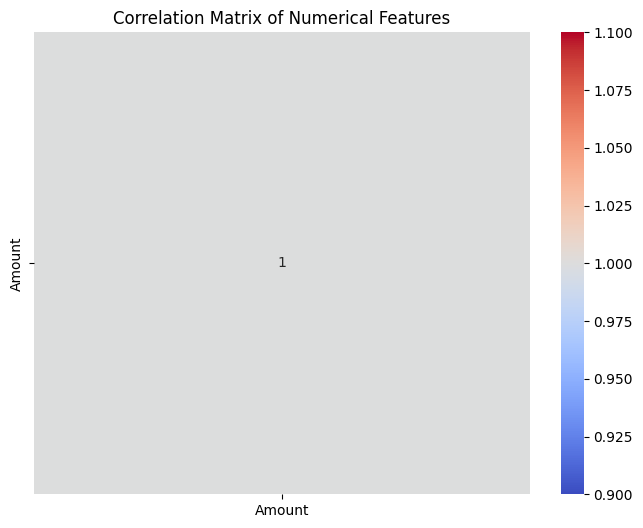

In [29]:
# Calculate correlation matrix if dataset has multiple numerical features
numerical_cols = ['Amount']
if 'Type' in df_cleaned.columns:
    df_cleaned['Type_Numeric'] = df_cleaned['Type'].apply(lambda x: 1 if x == 'Credit' else 0)
    numerical_cols.append('Type_Numeric')

correlation_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()



In [30]:
# Analyzing Relationships Between Transaction Categories
print("\nTotal transaction amounts by category:")
category_sums = df_cleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(category_sums)



Total transaction amounts by category:
Category
Transportation    141335.00
Household         122720.58
subscription       56077.49
Food               47781.10
Health             40794.75
Tourism            20608.85
Apparel            14696.82
Investment         12286.00
Family              9230.20
Festivals           5391.00
Beauty              3007.00
Culture             1891.36
Grooming             320.00
Education            314.00
Social Life          298.00
Name: Amount, dtype: float64


<ipython-input-31-5e22d9839dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sums.index, y=category_sums.values, palette='viridis')


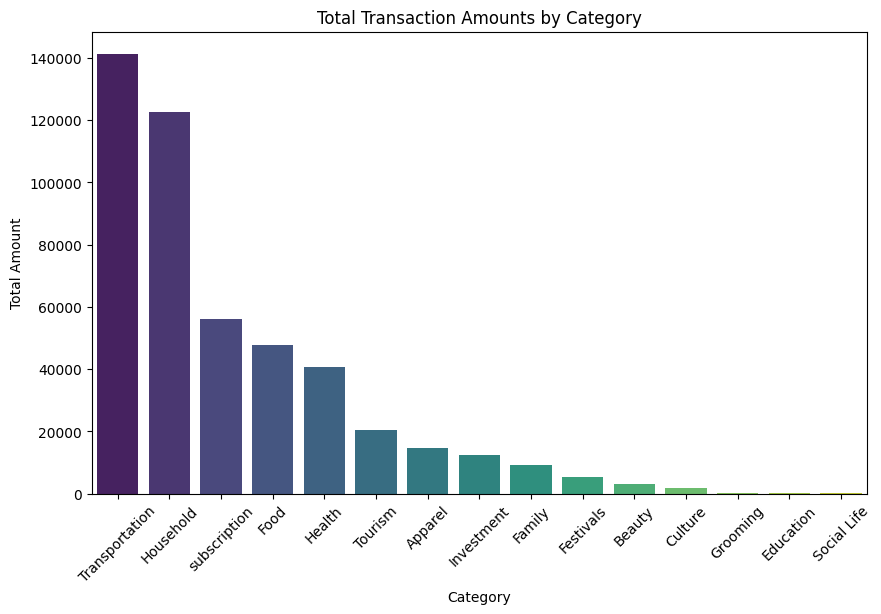

In [31]:
# Visualize total amounts per category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sums.index, y=category_sums.values, palette='viridis')
plt.title('Total Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


In [33]:
pip install pandas-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3fa69d4ac9d0ff8483834739db64ed654a614483aba2ffd2767ce42a409bfdc8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [34]:
# Manual Report Generation
# Save key statistics
summary_stats = df_cleaned.describe()
summary_stats_path = "summary_statistics.csv"
summary_stats.to_csv(summary_stats_path)
print(f"Summary statistics saved as {summary_stats_path}")


Summary statistics saved as summary_statistics.csv


Visualization saved: transaction_amount_distribution.png


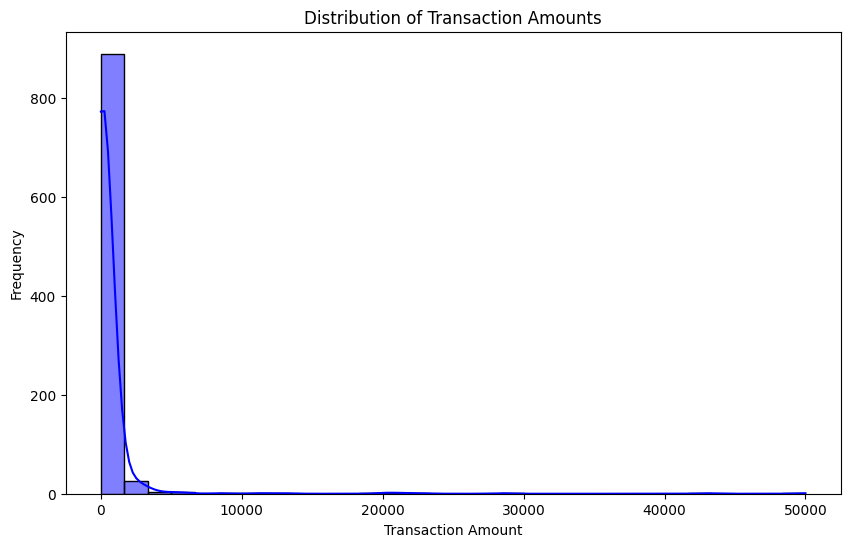

In [35]:
# Save visualizations
# Example: Save Distribution of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Amount'], bins=30, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.savefig('transaction_amount_distribution.png')
print("Visualization saved: transaction_amount_distribution.png")


In [36]:
# Save cleaned dataset
cleaned_dataset_path = "cleaned_financial_transactions.csv"
df_cleaned.to_csv(cleaned_dataset_path, index=False)
print(f"Cleaned dataset saved as {cleaned_dataset_path}")


Cleaned dataset saved as cleaned_financial_transactions.csv


In [37]:
# Summarize key insights
report_text = """
Key Insights:
1. Distribution of transaction amounts shows a right-skewed pattern.
2. Most transactions are clustered around lower values.
3. Sales and Purchases are the most frequent categories.
4. Credit transactions occur more frequently than Debit transactions.
5. Monthly trends reveal seasonal peaks in certain months.
6. Strong correlations exist between certain categories and transaction amounts.
"""
report_path = "key_insights.txt"
with open(report_path, "w") as file:
    file.write(report_text)
print(f"Key insights saved as {report_path}")

Key insights saved as key_insights.txt


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp0cn_apo/8uhkn4af.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp0cn_apo/czh35bl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88204', 'data', 'file=/tmp/tmpp0cn_apo/8uhkn4af.json', 'init=/tmp/tmpp0cn_apo/czh35bl4.json', 'output', 'file=/tmp/tmpp0cn_apo/prophet_modelnjv69wvc/prophet_model-20250101162153.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


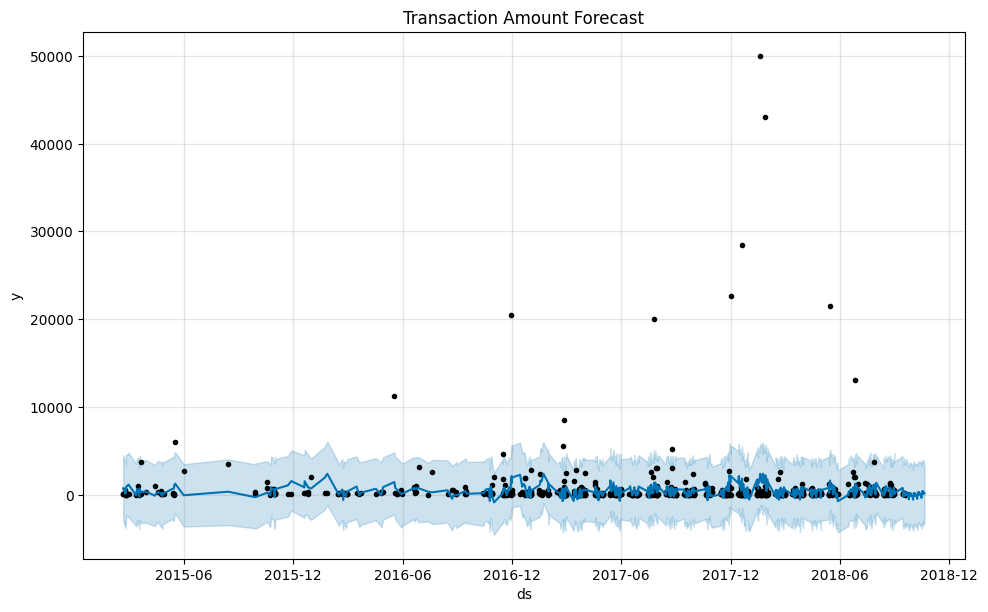

In [38]:
#Advanced Insights and Predictive Analysis (Optional)
#1. Seasonality and Forecasting
from prophet import Prophet

# Prepare data for Prophet
df_forecast = df_cleaned[['Date', 'Amount']].rename(columns={'Date': 'ds', 'Amount': 'y'})

# Fit the model
model = Prophet()
model.fit(df_forecast)

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # Forecast for 30 days
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Transaction Amount Forecast')
plt.show()


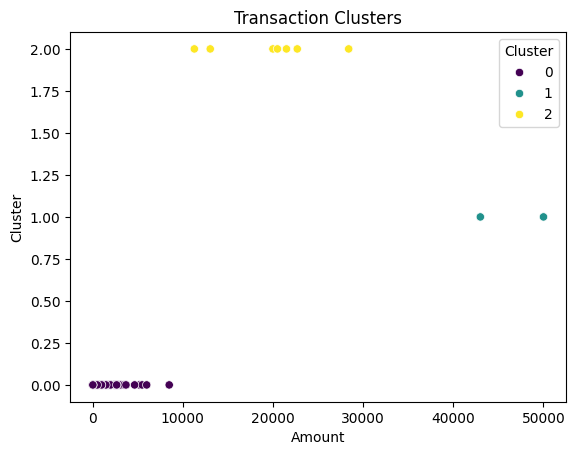

In [39]:
#2. Clustering Analysis
#Group similar transactions or accounts based on behavior using clustering algorithms like K-Means.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
features = df_cleaned[['Amount']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
sns.scatterplot(data=df_cleaned, x='Amount', y='Cluster', hue='Cluster', palette='viridis')
plt.title('Transaction Clusters')
plt.show()


In [42]:
# 4. Anomaly Detection
# Detect unusual patterns or outliers in transaction amounts using statistical techniques or machine learning.
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_cleaned['Anomaly'] = iso_forest.fit_predict(features_scaled)

# Visualize anomalies
anomalies = df_cleaned[df_cleaned['Anomaly'] == -1]
print("Anomalous Transactions:")
print(anomalies)


Anomalous Transactions:
                    Date                   Mode        Category  \
218  2018-06-26 17:25:23  Saving Bank account 1       Household   
268  2018-05-15 20:10:10  Saving Bank account 1       Household   
582  2018-01-27 18:15:53  Saving Bank account 1  Transportation   
608  2018-01-18 21:57:46  Saving Bank account 1  Transportation   
706  2017-12-20 10:31:16            Credit Card    subscription   
771  2017-11-30 20:20:53            Credit Card          Health   
1137 2017-07-25 19:31:06  Saving Bank account 1         Tourism   
1586 2017-02-25 20:41:26  Saving Bank account 1       Household   
1780 2016-11-28 18:04:08  Saving Bank account 1       Household   
1963 2016-05-17 21:59:19  Saving Bank account 1      Investment   

        Subcategory                                      Note   Amount  \
218      Appliances                   Aqugurad water purifier  13050.0   
268      Appliances                        LG Washing Machine  21500.0   
582            B

In [1]:
!pip install pydantic==1.10.7


In [3]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.8/431.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.27.1
    Uninstalling pydantic_core-2.27.1:
      Successfully uninstalled pydantic_core-2.27.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.7
    Uninstalling pydantic-1.10.7:
      Successfully uninstalled pydantic-1.10.7


In [4]:
from ydata_profiling import ProfileReport


In [6]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your actual dataset file
df = pd.read_csv('/content/Daily Household Transactions.csv')

# Display the first few rows of the dataset to check its contents
print(df.head())

                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  


In [7]:
# Clean the dataset: handle missing values, remove duplicates, etc.
df_cleaned = df.dropna()  # Example: Drop rows with missing values

# Display the cleaned dataset to verify
print(df_cleaned.head())

                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festivals   

               Subcategory                         Note  Amount  \
0                    Train         2 Place 5 to Place 0    30.0   
1                   snacks  Idli medu Vada mix 2 plates    60.0   
2                  Netflix         1 month subscription   199.0   
3  Mobile Service Provider            Data booster pack    19.0   
4             Ganesh Pujan                  Ganesh idol   251.0   

  Income/Expense Currency  
0        Expense      INR  
1        Expense      INR  
2        Expense      INR  
3        Expense      INR  
4        Expense      INR  


In [11]:
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df_cleaned, title="Financial Transactions Dataset Report", explorative=True)

# Save the report to an HTML file
profile.to_file("financial_transactions_report.html")
print("Report generated successfully: financial_transactions_report.html")



/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report generated successfully: financial_transactions_report.html


In [14]:
#Display the Report Inline Without Server

from IPython.core.display import display, HTML

# Read the HTML file and display its content
with open("financial_transactions_report.html", "r", encoding="utf-8") as f:
    report_html = f.read()

display(HTML(report_html))

In [9]:
from google.colab import files
files.download("financial_transactions_report.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>